# MACD(Moving Average Convergence and Divergence )

- 이동평균 수렴확산 지수 : 단기 지수이동평균이 장기 지수이동평균보다 위쪽에 위치하면 MACD>0 주가가 상승하는 신호
- 추세 전환 시점을 예측하기 보다 **추세의 방향과 주가의 움직임을 분석하는 지표**


- 1.MACD = 12일 이동평균선 - 26일 이동평균선
- 2.MACD Signal = MACD의 9일 이동평균선
- 3. 0선 = 지표의 양/음 구분 기준

# 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import FinanceDataReader as fdr

# 개별 종목 일별시세

In [6]:
# 팬오션 : 028670
df = fdr.DataReader("028670", "2020", "2022")
df.shape

(337, 6)

# 지수이동평균

- 단순이동평균선은 추세전환 신호가 늦게 나타나는 단점때문에 MACD에서는 지수이동평균 사용

In [7]:
short = 12
long = 26

df["ema_short"] = df["Close"].ewm(short).mean()
df["ema_long"] = df["Close"].ewm(long).mean()

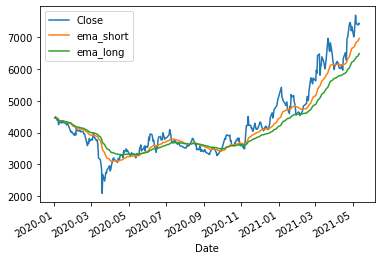

In [8]:
df[["Close", "ema_short", "ema_long"]].plot()

# MACD 값

In [9]:
df["MACD"] = df["ema_short"] - df["ema_long"]

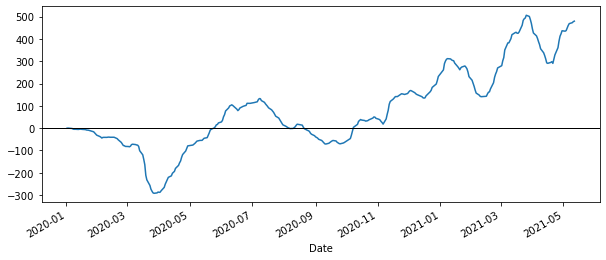

In [12]:
df["MACD"].plot(figsize=(10,4))
plt.axhline(0, c="k", lw=1)

# Signal 값

In [15]:
df["signal"] = df["MACD"].ewm(9).mean()

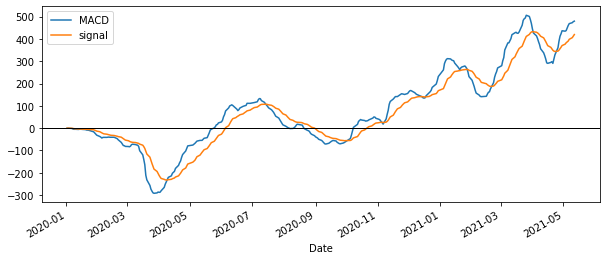

In [17]:
df[["MACD","signal"]].plot(figsize=(10,4))
plt.axhline(0,c="k",lw=1)

# MACD oscillator 값

In [18]:
df["macdhist"] = df["MACD"] - df["signal"]

<BarContainer object of 337 artists>

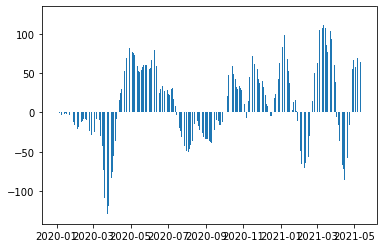

In [20]:
plt.bar(df.index, df.macdhist)

# MACD 함수

In [26]:
def make_macd(df, short=12, long=26, t=9):
    """
    데이터프레임을 받아
    ema_short, ema_long, MACD, signal, macdist 값을 생성하는 함수
    """
    ema_short = df.Close.ewm(short).mean()
    ema_long = df.Close.ewm(long).mean()
    MACD = ema_short - ema_long
    signal = MACD.ewm(t).mean() # MACD에 대한 9일 지수이동평균
    macdhist = MACD - signal
    
    df = df.assign(ema_short=ema_short, ema_long=ema_long, MACD=MACD, 
              signal=signal, macdhist=macdhist) # 변수 할당
    return df

In [27]:
make_macd(df)

,Open,High,Low,Close,Volume,Change,ema_short,ema_long,MACD,signal,macdhist
Date,,,,,,,,,,,
2020-01-02,4530,4535,4440,4460,1079464,-0.018702,4460.000000,4460.000000,0.000000,0.000000,0.000000
2020-01-03,4460,4555,4440,4500,921814,0.008969,4480.800000,4480.377358,0.422642,0.222443,0.200199
2020-01-06,4450,4450,4320,4380,1140640,-0.026667,4444.477612,4445.647841,-1.170229,-0.291458,-0.878771
2020-01-07,4425,4430,4355,4410,1002069,0.006849,4434.797444,4436.225206,-1.427762,-0.621875,-0.805887
2020-01-08,4340,4395,4200,4250,2046417,-0.036281,4391.698010,4396.117216,-4.419206,-1.549162,-2.870044
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-06,7280,7760,7240,7700,17992669,0.075419,6800.013369,6339.752964,460.260404,390.592613,69.667792
2021-05-07,7810,7840,7320,7440,20286260,-0.033766,6849.243110,6380.502991,468.740118,398.407363,70.332755
2021-05-10,7460,7520,7170,7390,10111009,-0.006720,6890.839794,6417.891890,472.947903,405.861417,67.086486


In [29]:
# 함수 확인
amd = fdr.DataReader("AMD", "2020", "2021")
amd.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,49.10,46.86,49.25,46.63,80770000.0,0.0706
2020-01-03,48.60,48.03,49.39,47.54,73360000.0,-0.0102
2020-01-06,48.39,48.02,48.86,47.86,48180000.0,-0.0043
2020-01-07,48.25,49.35,49.39,48.04,59940000.0,-0.0029
2020-01-08,47.83,47.85,48.30,47.14,53870000.0,-0.0087


In [31]:
amd = make_macd(amd)
amd

,Close,Open,High,Low,Volume,Change,ema_short,ema_long,MACD,signal,macdhist
Date,,,,,,,,,,,
2020-01-02,49.10,46.86,49.25,46.63,80770000.0,0.0706,49.100000,49.100000,0.000000,0.000000,0.000000
2020-01-03,48.60,48.03,49.39,47.54,73360000.0,-0.0102,48.840000,48.845283,-0.005283,-0.002781,-0.002502
2020-01-06,48.39,48.02,48.86,47.86,48180000.0,-0.0043,48.677846,48.687760,-0.009913,-0.005413,-0.004501
2020-01-07,48.25,49.35,49.39,48.04,59940000.0,-0.0029,48.557721,48.572049,-0.014327,-0.008005,-0.006323
2020-01-08,47.83,47.85,48.30,47.14,53870000.0,-0.0087,48.387998,48.412231,-0.024233,-0.011968,-0.012265
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,91.81,91.80,92.51,91.31,16710000.0,0.0028,91.291428,87.549742,3.741686,3.392709,0.348978
2020-12-28,91.60,93.04,93.12,90.83,30630000.0,-0.0023,91.315164,87.699763,3.615401,3.414978,0.200423
2020-12-29,90.62,91.51,92.40,89.46,31750000.0,-0.0107,91.261690,87.807928,3.453762,3.418856,0.034906


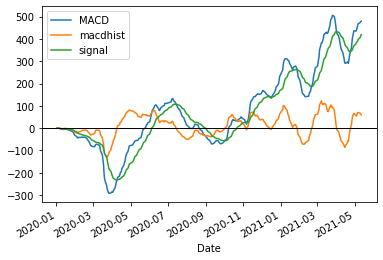

In [35]:
df[["MACD","macdhist","signal"]].plot()
plt.axhline(0, c="k", lw=1)

<BarContainer object of 337 artists>

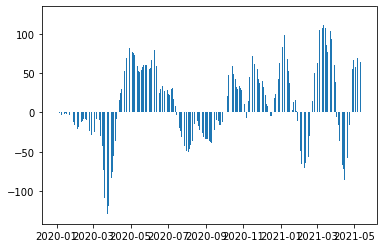

In [37]:
plt.bar(df.index, df.macdhist)

# MACD 시각화

In [40]:
ohlc_col = ["Open","High","Low","Close"]

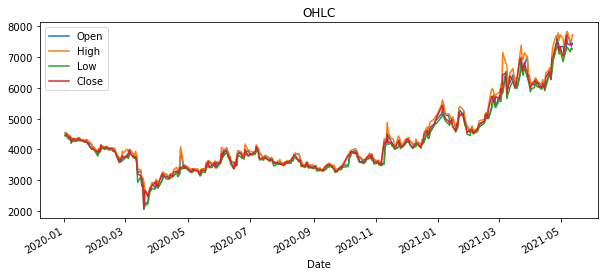

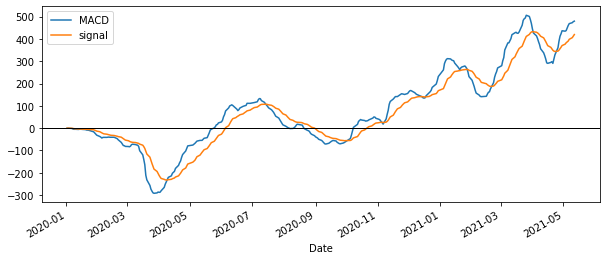

In [45]:
df[ohlc_col].plot(figsize=(10,4), title="OHLC")
df[["MACD","signal"]].plot(figsize=(10,4))
plt.axhline(0, c="k", lw=1)

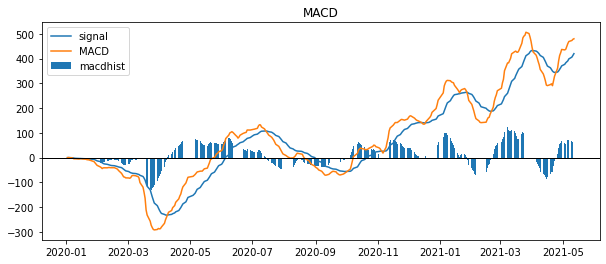

In [52]:
fig, axes = plt.subplots(figsize=(10,4))

plt.bar(df.index, df["macdhist"], label="macdhist")
plt.plot(df.index, df.signal, label="signal")
plt.plot(df.index, df.MACD, label="MACD")
plt.axhline(0, c="k", lw=1)
plt.title("MACD")
plt.legend(loc="best")

# MACD 시각화 함수

In [59]:
def plot_macd(df):
    
    df= make_macd(df)
    
    ohlc_col = ["Open","High","Low","Close"]
    df[ohlc_col].plot(figsize=(10,4), title="OHLC")
    
    fig, axes = plt.subplots(figsize=(10,3))

    plt.bar(df.index, df["macdhist"], label="macdhist")
    plt.plot(df.index, df.signal, label="signal")
    plt.plot(df.index, df.MACD, label="MACD")
    plt.axhline(0, c="k", lw=1)
    plt.title("MACD")
    plt.legend(loc="best")

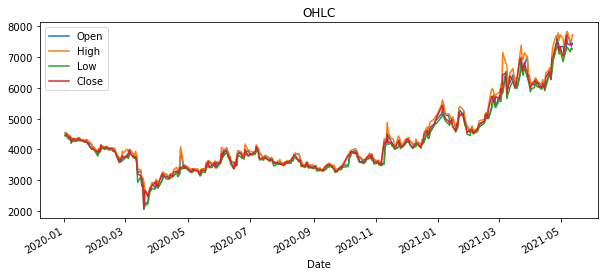

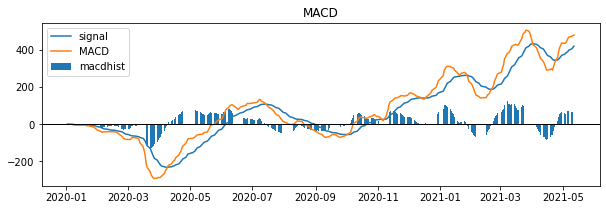

In [60]:
plot_macd(df)

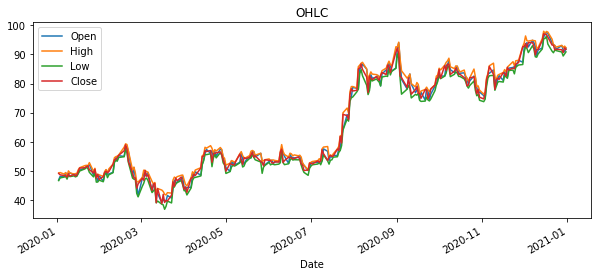

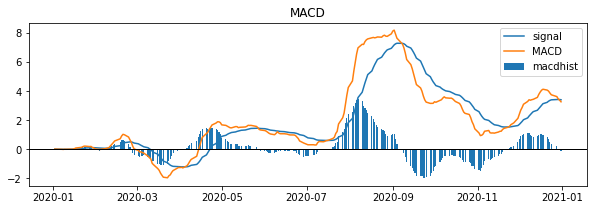

In [61]:
# 함수 테스트
plot_macd(amd)

# plotly 시각화

In [62]:
import plotly.express as px

In [64]:
px.line(df[ohlc_col], title="OHLC", height=300)

In [66]:
px.line(df[["MACD","signal"]], height=300, title="MACD")

In [67]:
px.bar(df.macdhist, height=300)

# graph_object와 subplots을 활용한 시각화

In [68]:
import plotly.graph_objects as go
from plotly import subplots

In [84]:
candlestick = go.Candlestick(x=df.index, open=df.Open, high=df.High, low=df.Low, close= df.Close )

macd = go.Scatter(x=df.index, y=df.MACD, name="MACD")
signal= go.Scatter(x=df.index, y=df.signal, name="signal")
oscillator = go.Bar(x=df.index, y=df.macdhist, name="oscillator")
trade_volume = go.Bar(x=df.index, y=df.Volume, name="거래량")

In [87]:


fig = subplots.make_subplots(rows=4, cols=1)

fig.append_trace(candlestick, row=1, col=1)
fig.append_trace(macd, row=3, col=1)
fig.append_trace(signal, row=3, col=1)
fig.append_trace(oscillator, row=3, col=1)
fig.append_trace(trade_volume, row=4, col=1)
fig.show()